In [ ]:
# Uploading the data and creating dataframe
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()
for filename in uploaded.keys():
  df = pd.read_csv(filename)
print(df.head())

Saving World Energy Consumption.csv to World Energy Consumption.csv
  iso_code      country  year  coal_prod_change_pct  coal_prod_change_twh  \
0      AFG  Afghanistan  1900                   NaN                   NaN   
1      AFG  Afghanistan  1901                   NaN                   0.0   
2      AFG  Afghanistan  1902                   NaN                   0.0   
3      AFG  Afghanistan  1903                   NaN                   0.0   
4      AFG  Afghanistan  1904                   NaN                   0.0   

   gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   oil_prod_change_twh  energy_cons_change_pct  ...  solar_e

In [ ]:
# Selecting required columns

df = df[df['country'] == 'India']
df = df[[
'year',
'population',
'gdp',
'biofuel_electricity',
'coal_electricity',
'gas_electricity',
'hydro_electricity',
'nuclear_electricity',
'oil_electricity',
'other_renewable_electricity',
'solar_electricity',
'wind_electricity',
'biofuel_elec_per_capita',
'coal_elec_per_capita',
'gas_elec_per_capita',
'hydro_elec_per_capita',
'nuclear_elec_per_capita',
'oil_elec_per_capita',
'other_renewables_elec_per_capita',
'solar_elec_per_capita',
'wind_elec_per_capita']]
df.isnull().sum()
df.head()

,year,population,gdp,biofuel_electricity,coal_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,...,wind_electricity,biofuel_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,other_renewables_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita
7207,1900,243073952.0,3.220000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7208,1901,244123760.0,3.300000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7209,1902,245171584.0,3.590000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7210,1903,246230416.0,3.660000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7211,1904,247293792.0,3.690000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filtering the dataframe
df = df[df['year']>=1990]
df.isnull().sum()
# Filling the missing values
df["biofuel_elec_per_capita"]=df['biofuel_elec_per_capita'].fillna(0)
df["biofuel_electricity"]=df['biofuel_electricity'].fillna(0)
df.isnull().sum()

year                                0
population                          0
gdp                                 0
biofuel_electricity                 0
coal_electricity                    0
gas_electricity                     0
hydro_electricity                   0
nuclear_electricity                 0
oil_electricity                     0
other_renewable_electricity         0
solar_electricity                   0
wind_electricity                    0
biofuel_elec_per_capita             0
coal_elec_per_capita                0
gas_elec_per_capita                 0
hydro_elec_per_capita               0
nuclear_elec_per_capita             0
oil_elec_per_capita                 0
other_renewables_elec_per_capita    0
solar_elec_per_capita               0
wind_elec_per_capita                0
dtype: int64

In [ ]:
df = df.reset_index(drop='true')
df.tail()
df.isnull().sum()

year                                0
population                          0
gdp                                 0
biofuel_electricity                 0
coal_electricity                    0
gas_electricity                     0
hydro_electricity                   0
nuclear_electricity                 0
oil_electricity                     0
other_renewable_electricity         0
solar_electricity                   0
wind_electricity                    0
biofuel_elec_per_capita             0
coal_elec_per_capita                0
gas_elec_per_capita                 0
hydro_elec_per_capita               0
nuclear_elec_per_capita             0
oil_elec_per_capita                 0
other_renewables_elec_per_capita    0
solar_elec_per_capita               0
wind_elec_per_capita                0
dtype: int64

In [ ]:
# Filling missing population value and creating features
df['population'].fillna(1396387127, inplace=True)
df['total_electricity_production'] = df['biofuel_electricity'] + df['coal_electricity'] + df['gas_electricity'] + df['hydro_electricity'] + df['nuclear_electricity'] + df['oil_electricity'] + df['other_renewable_electricity'] + df['solar_electricity'] + df['wind_electricity']
df['total_electricity_consumption'] = df['biofuel_elec_per_capita'] + df['coal_elec_per_capita'] + df['gas_elec_per_capita'] + df['hydro_elec_per_capita'] +df['nuclear_elec_per_capita'] + df['oil_elec_per_capita'] + df['other_renewables_elec_per_capita'] + df['solar_elec_per_capita'] + df['wind_elec_per_capita']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              31 non-null     int64  
 1   population                        31 non-null     float64
 2   gdp                               31 non-null     float64
 3   biofuel_electricity               31 non-null     float64
 4   coal_electricity                  31 non-null     float64
 5   gas_electricity                   31 non-null     float64
 6   hydro_electricity                 31 non-null     float64
 7   nuclear_electricity               31 non-null     float64
 8   oil_electricity                   31 non-null     float64
 9   other_renewable_electricity       31 non-null     float64
 10  solar_electricity                 31 non-null     float64
 11  wind_electricity                  31 non-null     float64
 12  biofuel_el

Text(0, 0.5, 'Total electricity consumed')

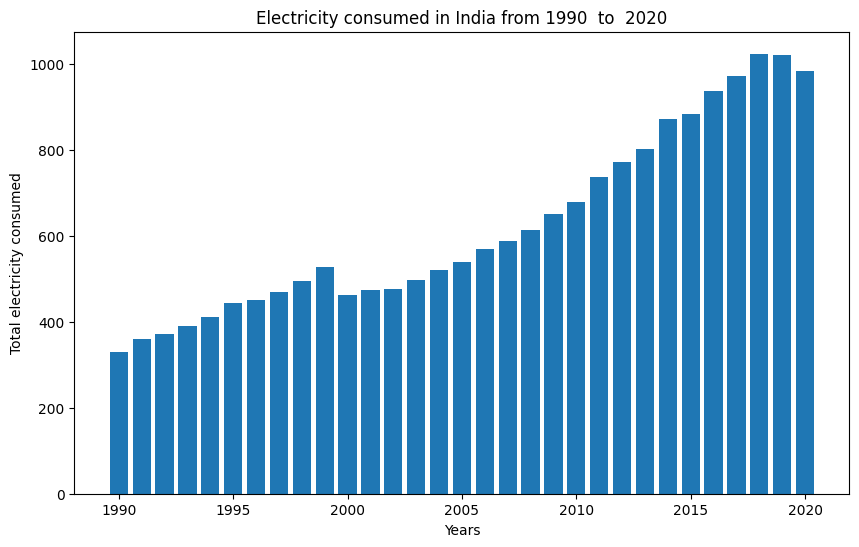

In [ ]:
# Plotting for visual analysis
plt.figure(figsize=(10,6))
plt.bar(df['year'],df['total_electricity_consumption'])
plt.title('Electricity consumed in India from 1990  to  2020')
plt.xlabel('Years')
plt.ylabel('Total electricity consumed')

In [ ]:
#Necessary imports
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Splitting of train and eval data
df.columns
features = df.drop(columns=['total_electricity_consumption'])
target = df['total_electricity_consumption']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
#Training the model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 394026.9062 - val_loss: 431549.4375
Epoch 2/500
1/1 [==============================] - 0s 38ms/step - loss: 393980.5000 - val_loss: 431500.7500
Epoch 3/500
1/1 [==============================] - 0s 38ms/step - loss: 393935.9062 - val_loss: 431449.0938
Epoch 4/500
1/1 [==============================] - 0s 36ms/step - loss: 393904.0938 - val_loss: 431395.4062
Epoch 5/500
1/1 [==============================] - 0s 48ms/step - loss: 393849.7500 - val_loss: 431341.7500
Epoch 6/500
1/1 [==============================] - 0s 36ms/step - loss: 393826.8438 - val_loss: 431285.8438
Epoch 7/500
1/1 [==============================] - 0s 35ms/step - loss: 393747.1562 - val_loss: 431225.5938
Epoch 8/500
1/1 [==============================] - 0s 40ms/step - loss: 393678.2500 - val_loss: 431163.1875
Epoch 9/500
1/1 [==============================] - 0s 36ms/step - loss: 393596.9375 - val_loss: 431097.0000
Epoch 10/500
1/1 [============

In [ ]:
#Evaluation of the trained model
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 score: {r2}')

1/1 [==============================] - 0s 170ms/step
Mean Absolute Error: 73.70398172433033
Mean Squared Error: 7054.690991320502
R2 score: 0.8331945358549802


In [ ]:
# Assuming the user provides the necessary data for 2021 and 2022
# Example data structure for new data
new_data = {
    'year': [2021, 2022],
    'population': [1400000000, 1410000000],
    'gdp': [3000000, 3100000],
    'biofuel_electricity': [1000, 1100],
    'coal_electricity': [200000, 210000],
    'gas_electricity': [50000, 52000],
    'hydro_electricity': [100000, 105000],
    'nuclear_electricity': [20000, 21000],
    'oil_electricity': [30000, 31000],
    'other_renewable_electricity': [15000, 16000],
    'solar_electricity': [25000, 26000],
    'wind_electricity': [35000, 36000],
    'biofuel_elec_per_capita': [0.01, 0.011],
    'coal_elec_per_capita': [0.2, 0.21],
    'gas_elec_per_capita': [0.05, 0.052],
    'hydro_elec_per_capita': [0.1, 0.105],
    'nuclear_elec_per_capita': [0.02, 0.021],
    'oil_elec_per_capita': [0.03, 0.031],
    'other_renewables_elec_per_capita': [0.015, 0.016],
    'solar_elec_per_capita': [0.025, 0.026],
    'wind_elec_per_capita': [0.035, 0.036],
    'total_electricity_production': [476000, 498100],
}

new_df = pd.DataFrame(new_data)
new_df_scaled = scaler.transform(new_df)
new_df_scaled =new_df_scaled.reshape((new_df_scaled.shape[0], 1, new_df_scaled.shape[1], ))
predictions = model.predict(new_df_scaled)
print(f'Predicted total electricity consumption for 2021: {predictions[0]}')
print(f'Predicted total electricity consumption for 2022: {predictions[1]}')
#End

1/1 [==============================] - 0s 17ms/step
Predicted total electricity consumption for 2021: [246832.16]
Predicted total electricity consumption for 2022: [262202.47]


In [ ]:
!pip install gradio
import gradio as gr
def predict_energy_consumption(year, population, gdp, biofuel_electricity, coal_electricity, gas_electricity, hydro_electricity, nuclear_electricity, oil_electricity, other_renewable_electricity, solar_electricity, wind_electricity, biofuel_elec_per_capita, coal_elec_per_capita, gas_elec_per_capita, hydro_elec_per_capita, nuclear_elec_per_capita, oil_elec_per_capita, other_renewables_elec_per_capita, solar_elec_per_capita, wind_elec_per_capita):
    input_data = pd.DataFrame({
        'year': [year],
        'population': [population],
        'gdp': [gdp],
        'biofuel_electricity': [biofuel_electricity],
        'coal_electricity': [coal_electricity],
        'gas_electricity': [gas_electricity],
        'hydro_electricity': [hydro_electricity],
        'nuclear_electricity': [nuclear_electricity],
        'oil_electricity': [oil_electricity],
        'other_renewable_electricity': [other_renewable_electricity],
        'solar_electricity': [solar_electricity],
        'wind_electricity': [wind_electricity],
        'biofuel_elec_per_capita': [biofuel_elec_per_capita],
        'coal_elec_per_capita': [coal_elec_per_capita],
        'gas_elec_per_capita': [gas_elec_per_capita],
        'hydro_elec_per_capita': [hydro_elec_per_capita],
        'nuclear_elec_per_capita': [nuclear_elec_per_capita],
        'oil_elec_per_capita': [oil_elec_per_capita],
        'other_renewables_elec_per_capita': [other_renewables_elec_per_capita],
        'solar_elec_per_capita': [solar_elec_per_capita],
        'wind_elec_per_capita': [wind_elec_per_capita],
        "total_electricity_production": [sum([biofuel_electricity, coal_electricity, gas_electricity, hydro_electricity, nuclear_electricity, oil_electricity, other_renewable_electricity, solar_electricity, wind_electricity])]
    })

    input_scaled = scaler.transform(input_data)
    input_scaled = input_scaled.reshape((input_scaled.shape[0], 1, input_scaled.shape[1]))
    prediction = model.predict(input_scaled)
    return prediction[0][0]
description = """
**Energy Consumption Forecasting System**

This project aims to predict electricity consumption based on various factors such as population, GDP, and different sources of electricity production. The model is trained on historical data and can forecast future consumption.

**Input:**
- Year
- Population
- GDP
- Electricity production from various sources (biofuel, coal, gas, hydro, nuclear, oil, other renewables, solar, wind)
- Per capita electricity consumption from various sources

**Output:**
- Predicted total electricity consumption

**Advancements Expected:**
This project can help in better planning and management of energy resources, leading to more efficient energy usage and reduced wastage. It can also aid in policy-making and infrastructure development.

**Model Choice:**
We chose an LSTM model for this task due to its ability to capture temporal dependencies and patterns in time-series data, which is crucial for accurate forecasting.

**Dataset:**
The dataset includes historical data on electricity consumption and production from various sources, along with population and GDP data of the last 30 years.
"""

inputs = [
    gr.Number(label="Year"),
    gr.Number(label="Population"),
    gr.Number(label="GDP"),
    gr.Number(label="Biofuel Electricity"),
    gr.Number(label="Coal Electricity"),
    gr.Number(label="Gas Electricity"),
    gr.Number(label="Hydro Electricity"),
    gr.Number(label="Nuclear Electricity"),
    gr.Number(label="Oil Electricity"),
    gr.Number(label="Other Renewable Electricity"),
    gr.Number(label="Solar Electricity"),
    gr.Number(label="Wind Electricity"),
    gr.Number(label="Biofuel Electricity Per Capita"),
    gr.Number(label="Coal Electricity Per Capita"),
    gr.Number(label="Gas Electricity Per Capita"),
    gr.Number(label="Hydro Electricity Per Capita"),
    gr.Number(label="Nuclear Electricity Per Capita"),
    gr.Number(label="Oil Electricity Per Capita"),
    gr.Number(label="Other Renewables Electricity Per Capita"),
    gr.Number(label="Solar Electricity Per Capita"),
    gr.Number(label="Wind Electricity Per Capita")
]

outputs = gr.Textbox(label="Predicted Total Electricity Consumption")

gr.Interface(fn=predict_energy_consumption, inputs=inputs, outputs=outputs, description=description).launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://66445748bac59afcd4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 28ms/step


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 532, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1923, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1509, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    r